In [7]:
import configparser
import mysql.connector
import os
import pandas as pd
import seaborn as sns


In [8]:
def connect_to_sql_db(host_name, user_name, user_password, db):
    dbconnection = mysql.connector.connect(
        host = host_name,
        user = user_name,
        passwd = user_password,
        database = db
    )
    print("Connection to MySQL DB successful")

    cursorx = dbconnection.cursor()

    return dbconnection, cursorx

def retrieve_data(query):
    cursor.execute(query)

    # Fetch column names
    column_names = [column[0] for column in cursor.description]

    # Fetch data rows
    rows = cursor.fetchall()

    # Create a Pandas DataFrame with column names and data
    data_frame = pd.DataFrame(rows, columns=column_names)

    return data_frame


In [9]:
os.chdir('../')
# Import settings
config = configparser.ConfigParser()
config.read(r"config\config.ini", encoding='utf-8')

host = config.get('SQL DB', 'host_name')
user = config.get('SQL DB', 'user')
passwd = config.get('SQL DB', 'passwd')
database = config.get('SQL DB', 'database')

# Connect to database
cnx, cursor = connect_to_sql_db(host, user, passwd, database)


Connection to MySQL DB successful


In [10]:
#Data import query
import_data_query = "SELECT " \
                    "   time_till_departure AS 'Time till departure'," \
                    "   AVG(price) AS 'Price'," \
                    "   CASE WEEKDAY(MIN(departure_datetime)) " \
                    "       WHEN 0 THEN 'Monday' " \
                    "       WHEN 1 THEN 'Tuesday' " \
                    "       WHEN 2 THEN 'Wednesday' " \
                    "       WHEN 3 THEN 'Thursday' " \
                    "       WHEN 4 THEN 'Friday' " \
                    "       WHEN 5 THEN 'Saturday' " \
                    "       WHEN 6 THEN 'Sunday' " \
                    "   END AS 'Day of the week' " \
                    "FROM prices " \
                    "GROUP BY time_till_departure, WEEKDAY(departure_datetime) " \
                    "ORDER BY time_till_departure ASC;"

price_days_till_flight = retrieve_data(import_data_query)

In [11]:
price_days_till_flight

,Time till departure,Price,Day of the week
0,0,125.497143,Monday
1,0,133.494000,Tuesday
2,0,137.164000,Friday
3,0,113.415714,Saturday
4,0,153.323333,Sunday
...,...,...,...
1295,259,50.746000,Monday
1296,259,74.763111,Tuesday
1297,259,61.042326,Friday
1298,259,40.895938,Saturday


<Axes: xlabel='Time till departure', ylabel='Price'>

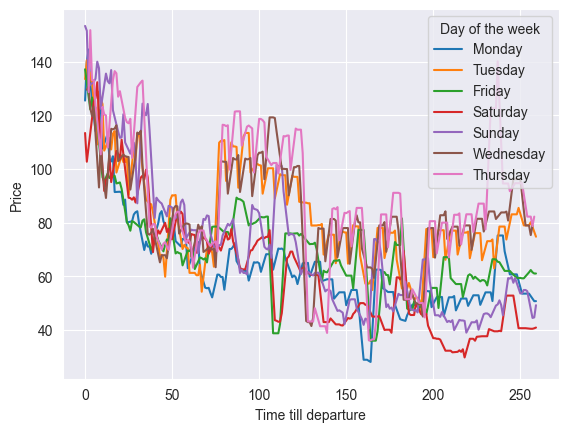

In [12]:
# Plot the data
sns.lineplot(data = price_days_till_flight, x = "Time till departure", y = 'Price', hue = "Day of the week")